<a href="https://www.kaggle.com/code/shishir47/titanic-hw2-task-1?scriptVersionId=108399681" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [78]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [79]:
plt.rcParams['figure.figsize'] = [9,4]
plt.rcParams['figure.dpi'] = 68
plt.style.use('ggplot')
sns.set_theme(style="darkgrid")

In [80]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
train_data =  pd.read_csv("/kaggle/input/titanic/train.csv")
test_data =  pd.read_csv("/kaggle/input/titanic/test.csv")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [81]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].mean())

In [82]:
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].mean())

In [83]:
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')

In [84]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data['Embarked'] = test_data['Embarked'].fillna('S')

In [85]:
print(test_data.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [86]:
train_data['FareInterval'] = pd.qcut(train_data['Fare'], 4)

In [87]:
print(train_data[['FareInterval', 'Survived']].groupby(['FareInterval'], as_index=False).mean().sort_values(by='FareInterval', ascending=True))
print('\n')

      FareInterval  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081




In [88]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)

In [89]:
print(train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True))

            AgeBand  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.344168
2  (32.252, 48.168]  0.404255
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


In [90]:
def FareInterval(fare):
    if fare <= 7.91 : return 0
    elif fare <= 14.545: return 1
    elif fare <= 31.0: return 2
    else: return 3

In [91]:
def ageband(age):
    if age <= 16 : return 0
    elif age <= 27: return 1
    elif age <= 40: return 2
    elif age <= 53: return 3
    elif age <= 64: return 4
    else: return 5

In [92]:
def cabinnum(cabin):
    if cabin[0] == 'A': return 0
    elif cabin[0] == 'B': return 1
    elif cabin[0] == 'C': return 2
    elif cabin[0] == 'D': return 3
    elif cabin[0] == 'E': return 4
    elif cabin[0] == 'F': return 5
    elif cabin[0] == 'G': return 6
    else: return 7

In [93]:
def embarked(val):
    if val == 'C' : return 1
    elif val== 'Q' : return 2
    else: return 0

In [94]:
train_data['Enum'] = train_data['Embarked'].map(embarked) 
test_data['Enum'] = test_data['Embarked'].map(embarked)  

In [95]:
train_data['FareInterval'] = train_data['Fare'].map(FareInterval)
test_data['FareInterval'] = test_data['Fare'].map(FareInterval)

In [96]:
train_data['AgeBand'] = train_data['Age'].map(ageband)
test_data['AgeBand'] = test_data['Age'].map(ageband)

In [97]:
train_data['CabinNum'] = train_data['Cabin'].map(cabinnum)
test_data['CabinNum'] = test_data['Cabin'].map(cabinnum)

In [98]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

In [99]:
train_data['SexBinary'] = train_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_data['SexBinary'] = test_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [100]:
train_data['Cnull'] = (train_data['Cabin'] == 'Unknown').astype(int)
test_data['Cnull'] = (test_data['Cabin'] == 'Unknown').astype(int)

In [101]:
train_data['Alone'] = (train_data['FamilySize'] == 0).astype(int)
test_data['Alone'] = (test_data['FamilySize'] == 0).astype(int)

In [102]:
train_data['Person'] = train_data['SexBinary'] 
train_data.loc[train_data['Age'] <= 16, 'Person'] = 2
test_data['Person'] = test_data['SexBinary'] 
test_data.loc[test_data['Age'] <= 16, 'Person'] = 2

In [103]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
train_data['Title'].replace(['Mlle','Ms','Lady'], 'Miss',inplace=True)
train_data['Title'].replace(['Mme'], 'Mrs',inplace=True)
train_data['Title'].replace(['Countess','Capt','Col','Don','Dr',
                        'Major','Rev',"Sir","Jonkheer",'Dona'], 'Rare',inplace=True)

In [104]:
test_data['Title'] = test_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
test_data['Title'].replace(['Mlle','Ms','Lady'], 'Miss',inplace=True)
test_data['Title'].replace(['Mme'], 'Mrs',inplace=True)
test_data['Title'].replace(['Countess','Capt','Col','Don','Dr',
                        'Major','Rev',"Sir","Jonkheer",'Dona'], 'Rare',inplace=True)

In [105]:
train_data['TitleNum'] = train_data['Title'].map({'Mr':0,'Rare':1, 'Master':2,'Miss':3, 'Mrs':4})
test_data['TitleNum'] = test_data['Title'].map({'Mr':0,'Rare':1, 'Master':2,'Miss':3, 'Mrs':4})

In [106]:
print(train_data.corr()[2:]['Survived'])

Pclass         -0.338481
Age            -0.069809
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
FareInterval    0.303176
AgeBand        -0.083939
Enum            0.106811
CabinNum       -0.294804
FamilySize      0.016639
SexBinary       0.543351
Cnull          -0.316912
Alone          -0.203367
Person          0.440852
TitleNum        0.567132
Name: Survived, dtype: float64


In [107]:
training_data = px.imshow(train_data.corr())

In [108]:
y = train_data["Survived"]

In [109]:
features = [ "Pclass", "Alone", "AgeBand", "Enum", "FareInterval", "SexBinary"]

In [110]:
X = train_data[features]

In [111]:
plot = X.copy()
plot['Survived'] = y

In [112]:
parameters = {
    'random_state':[1912],
    'max_depth':[3,4,5,7,9],
    'max_leaf_nodes':[10, 15, 20, 30, 40, 100]
}

In [113]:
dtc = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [114]:
dtc.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 7, 9],
                         'max_leaf_nodes': [10, 15, 20, 30, 40, 100],
                         'random_state': [1912]})

In [115]:
print(dtc.score(X, y))
print(dtc.best_params_)

0.8585858585858586
{'max_depth': 9, 'max_leaf_nodes': 40, 'random_state': 1912}


In [116]:
decision_tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=1912)

In [117]:
decision_tree.fit(X, y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=1912)

In [118]:
print('five-fold cross validation: '+ str(cross_val_score(decision_tree, X, y, scoring="accuracy", cv = 5)))

five-fold cross validation: [0.80446927 0.7752809  0.79775281 0.78651685 0.8258427 ]


In [119]:
average_score = cross_val_score(decision_tree, X, y, scoring="accuracy", cv = 5).mean()

In [120]:
print('Mean accuracy of decision tree: ' + str(average_score))

Mean accuracy of decision tree: 0.7979725064339966


In [121]:
parameters = {
    'learning_rate':[0.01, 0.05, 0.1],
    'n_estimators':[10, 20, 100, 150],
    'max_features':[2, 3, 4, 5],
    'max_depth':[3, 5, 7],
    'max_leaf_nodes':[10, 20, 40],
    'random_state' : [1912]
}

In [122]:
print(grid_search.score(X, y))
print(grid_search.best_params_)

0.8395061728395061
{'learning_rate': 0.05, 'max_depth': 7, 'max_features': 2, 'max_leaf_nodes': 20, 'n_estimators': 20, 'random_state': 1912}


In [123]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1912)

In [124]:
print(cross_val_score(random_forest, X, y, scoring="accuracy", cv = 5))
average_score = cross_val_score(random_forest, X, y, scoring="accuracy", cv = 5).mean()
print('Mean accuracy of the Random Forest' + str(average_score))

[0.79329609 0.81460674 0.82022472 0.80337079 0.83146067]
Mean accuracy of the Random Forest0.812591802146758


In [125]:
decision_tree.fit(X, y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=1912)

In [126]:
plt.figure(figsize=(15, 10))

<Figure size 1020x680 with 0 Axes>

<Figure size 1020x680 with 0 Axes>

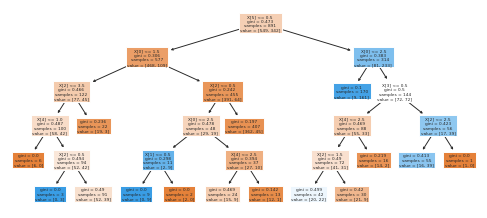

In [129]:
tree.plot_tree(decision_tree, filled=True)
plt.show()

In [130]:
X_test = test_data[features]

In [131]:
decision_tree.fit(X, y)
decision_tree_pred = decision_tree.predict(X_test)